In [8]:
import pandas as pd
import numpy as np

In [9]:
## Spis treści:
#1. Załadowanie danych
#2. Eksploracja danych
#3. Selekcja kolumn
#4. Selekcja wierszy
#5. Obliczanie nowych kolumn
#7. Filtrowanie danych

In [10]:
#1. Załadowanie danych:

# Funkcja pobiera dane finansowe dla określonej spółki, w naszym przypadku dla AMAZON.
#Funkcja korzysta z DataReader do pobrania danych z określonego źródła danych, w nasyzm przypadku 
#Strona internetowa 'stooq'
def fetch_financial_data(company='AMZN'):
    import pandas_datareader.data as web
    return web.DataReader(name = company, data_source = 'stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2023-06-05 to 2018-06-07
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [11]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-06-05,123.3600,125.8000,123.0300,125.3000,47950128
2023-06-02,124.9200,126.3900,124.0150,124.2500,61264414
2023-06-01,120.6900,123.4900,119.9300,122.7700,54375131
2023-05-31,121.4500,122.0400,119.1700,120.5800,72800787
2023-05-30,122.3700,122.9200,119.8550,121.6600,64314808
...,...,...,...,...,...
2018-06-13,85.1405,85.6875,85.0060,85.2430,66550580
2018-06-12,84.6500,84.9755,84.5760,84.9375,45184300
2018-06-11,84.0755,84.7120,84.0295,84.4560,46709680


In [12]:
# Pięć pierwszych(najnowszych) wierszy, można zmienić ilość podając liczbę 
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-06-05,123.36,125.80,123.030,125.30,47950128
2023-06-02,124.92,126.39,124.015,124.25,61264414
2023-06-01,120.69,123.49,119.930,122.77,54375131
2023-05-31,121.45,122.04,119.170,120.58,72800787
2023-05-30,122.37,122.92,119.855,121.66,64314808


In [13]:
# Pięć ostatnich(najstarszych) wierszy, można zmienić ilość podając liczbę 
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2018-06-13,85.1405,85.6875,85.0060,85.2430,66550580
2018-06-12,84.6500,84.9755,84.5760,84.9375,45184300
2018-06-11,84.0755,84.7120,84.0295,84.4560,46709680
2018-06-08,84.0560,84.4720,83.6505,84.1995,59102200
2018-06-07,84.9280,84.9950,83.8055,84.4650,75313740


In [14]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [15]:
# Zmieńmy sobie nazyw kolumn na małe literki:

df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2023-06-05,123.36,125.80,123.030,125.30,47950128
2023-06-02,124.92,126.39,124.015,124.25,61264414
2023-06-01,120.69,123.49,119.930,122.77,54375131
2023-05-31,121.45,122.04,119.170,120.58,72800787
2023-05-30,122.37,122.92,119.855,121.66,64314808


In [16]:
df.describe()

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,122.282432,123.792459,120.637670,122.227028,8.310148e+07
std,33.442765,33.766904,33.052507,33.368449,3.819021e+07
min,67.300000,69.801500,65.350000,67.198000,1.762674e+07
25%,92.050000,92.905500,90.900000,92.146000,5.743366e+07
50%,111.312000,114.000000,109.050000,111.750000,7.217758e+07
75%,158.338000,159.938000,156.250000,158.100000,9.785286e+07
max,187.200000,188.654000,184.840000,186.570000,3.113457e+08


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1257.0,1.222824e+02,3.344276e+01,6.730000e+01,9.205000e+01,1.113120e+02,1.583380e+02,1.872000e+02
high,1257.0,1.237925e+02,3.376690e+01,6.980150e+01,9.290550e+01,1.140000e+02,1.599380e+02,1.886540e+02
low,1257.0,1.206377e+02,3.305251e+01,6.535000e+01,9.090000e+01,1.090500e+02,1.562500e+02,1.848400e+02
close,1257.0,1.222270e+02,3.336845e+01,6.719800e+01,9.214600e+01,1.117500e+02,1.581000e+02,1.865700e+02
volume,1257.0,8.310148e+07,3.819021e+07,1.762674e+07,5.743366e+07,7.217758e+07,9.785286e+07,3.113457e+08


In [19]:
## 2. Eksploracja danych:

df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2023-06-05,123.36,125.80,123.030,125.30,47950128
2023-06-02,124.92,126.39,124.015,124.25,61264414
2023-06-01,120.69,123.49,119.930,122.77,54375131
2023-05-31,121.45,122.04,119.170,120.58,72800787
2023-05-30,122.37,122.92,119.855,121.66,64314808
2023-05-26,116.04,121.50,116.020,120.11,96779889
2023-05-25,116.63,116.87,114.310,115.00,66496681
2023-05-24,115.35,117.34,115.020,116.75,63487938
2023-05-23,114.27,117.14,113.780,114.99,67576262


In [21]:
# Selekcja kolumn
df[['open']]

,open
Date,
2023-06-05,123.36
2023-06-02,124.92
2023-06-01,120.69
2023-05-31,121.45
2023-05-30,122.37
2023-05-26,116.04
2023-05-25,116.63
2023-05-24,115.35
2023-05-23,114.27


In [22]:
df[['open', 'close']]

,open,close
Date,,
2023-06-05,123.36,125.30
2023-06-02,124.92,124.25
2023-06-01,120.69,122.77
2023-05-31,121.45,120.58
2023-05-30,122.37,121.66
2023-05-26,116.04,120.11
2023-05-25,116.63,115.00
2023-05-24,115.35,116.75
2023-05-23,114.27,114.99


In [23]:
df.iloc[:, 0]

Date
2023-06-05    123.36
2023-06-02    124.92
2023-06-01    120.69
2023-05-31    121.45
2023-05-30    122.37
2023-05-26    116.04
2023-05-25    116.63
2023-05-24    115.35
2023-05-23    114.27
2023-05-22    116.77
Name: open, dtype: float64

In [24]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2023-06-05,123.36,125.30
2023-06-02,124.92,124.25
2023-06-01,120.69,122.77
2023-05-31,121.45,120.58
2023-05-30,122.37,121.66
2023-05-26,116.04,120.11
2023-05-25,116.63,115.00
2023-05-24,115.35,116.75
2023-05-23,114.27,114.99


In [26]:
# Selekcja wierszy

df

,open,high,low,close,volume
Date,,,,,
2023-06-05,123.36,125.80,123.030,125.30,47950128
2023-06-02,124.92,126.39,124.015,124.25,61264414
2023-06-01,120.69,123.49,119.930,122.77,54375131
2023-05-31,121.45,122.04,119.170,120.58,72800787
2023-05-30,122.37,122.92,119.855,121.66,64314808
2023-05-26,116.04,121.50,116.020,120.11,96779889
2023-05-25,116.63,116.87,114.310,115.00,66496681
2023-05-24,115.35,117.34,115.020,116.75,63487938
2023-05-23,114.27,117.14,113.780,114.99,67576262


In [29]:
df.iloc[[0]]

,open,high,low,close,volume
Date,,,,,
2023-06-05,123.36,125.8,123.03,125.3,47950128


In [30]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2023-06-05,123.36,125.80,123.030,125.30,47950128
2023-06-02,124.92,126.39,124.015,124.25,61264414
2023-06-01,120.69,123.49,119.930,122.77,54375131


In [32]:
df.loc[['2023-06-05']]

,open,high,low,close,volume
Date,,,,,
2023-06-05,123.36,125.8,123.03,125.3,47950128


In [36]:
# Obliczanie nowych kolumn:

df = fetch_financial_data('BOLT')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 586 entries, 2023-06-05 to 2021-02-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    586 non-null    float64
 1   High    586 non-null    float64
 2   Low     586 non-null    float64
 3   Close   586 non-null    float64
 4   Volume  586 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 27.5 KB


In [37]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-06-05,1.77,1.8100,1.65,1.68,79691
2023-06-02,1.70,1.7500,1.69,1.70,18799
2023-06-01,1.73,1.8000,1.67,1.70,65924
2023-05-31,1.71,1.7539,1.62,1.72,194331
2023-05-30,1.86,1.8600,1.70,1.71,156122


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,586.0,8.132741,9.348326,1.27,1.5800,2.80,13.1800,3.977000e+01
High,586.0,8.463948,9.798347,1.30,1.6400,2.87,13.7725,4.307000e+01
Low,586.0,7.751115,8.868181,1.18,1.5300,2.64,12.6800,3.868960e+01
Close,586.0,8.083780,9.311112,1.26,1.5725,2.76,13.1275,3.993000e+01
Volume,586.0,254557.989761,412243.882696,18799.00,106938.0000,173403.00,272184.0000,6.910823e+06


In [41]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2023-06-05,1.77,1.8100,1.65,1.68,79691
2023-06-02,1.70,1.7500,1.69,1.70,18799
2023-06-01,1.73,1.8000,1.67,1.70,65924
2023-05-31,1.71,1.7539,1.62,1.72,194331
2023-05-30,1.86,1.8600,1.70,1.71,156122


In [44]:
# Stwórzmy nową kolumne, która będzie zawierać średnią z open i close

df['average'] = (df.open + df.close) / 2.0
df.head()

,open,high,low,close,volume,average
Date,,,,,,
2023-06-05,1.77,1.8100,1.65,1.68,79691,1.725
2023-06-02,1.70,1.7500,1.69,1.70,18799,1.700
2023-06-01,1.73,1.8000,1.67,1.70,65924,1.715
2023-05-31,1.71,1.7539,1.62,1.72,194331,1.715
2023-05-30,1.86,1.8600,1.70,1.71,156122,1.785


In [46]:
# Stwórzmy kolumne dzienną zmianę procentową

#Posrtujmy dane od najstarszych

df = df.sort_index()
df

,open,high,low,close,volume,average
Date,,,,,,
2021-02-05,26.10,33.9600,22.630,32.15,6910823,29.125
2021-02-08,28.40,34.8800,28.110,32.60,720402,30.500
2021-02-09,32.70,34.5000,30.020,33.90,623927,33.300
2021-02-10,34.00,35.1950,33.035,34.54,315198,34.270
2021-02-11,35.88,35.8800,32.010,34.51,488809,35.195
...,...,...,...,...,...,...
2023-05-30,1.86,1.8600,1.700,1.71,156122,1.785
2023-05-31,1.71,1.7539,1.620,1.72,194331,1.715
2023-06-01,1.73,1.8000,1.670,1.70,65924,1.715


In [54]:
df['close_shift'] = df.close.shift(1)
df.head()

,open,high,low,close,volume,average,close_shift
Date,,,,,,,
2021-02-05,26.10,33.960,22.630,32.15,6910823,29.125,NaN
2021-02-08,28.40,34.880,28.110,32.60,720402,30.500,32.15
2021-02-09,32.70,34.500,30.020,33.90,623927,33.300,32.60
2021-02-10,34.00,35.195,33.035,34.54,315198,34.270,33.90
2021-02-11,35.88,35.880,32.010,34.51,488809,35.195,34.54


In [58]:
df['daily_change'] = df.close / df.close_shift - 1
df.head()

,open,high,low,close,volume,average,close_shift,Daily Change,daily_change
Date,,,,,,,,,
2021-02-05,26.10,33.960,22.630,32.15,6910823,29.125,NaN,NaN,NaN
2021-02-08,28.40,34.880,28.110,32.60,720402,30.500,32.15,0.013997,0.013997
2021-02-09,32.70,34.500,30.020,33.90,623927,33.300,32.60,0.039877,0.039877
2021-02-10,34.00,35.195,33.035,34.54,315198,34.270,33.90,0.018879,0.018879
2021-02-11,35.88,35.880,32.010,34.51,488809,35.195,34.54,-0.000869,-0.000869


In [61]:
df = df.drop(columns = ['Daily Change'])

In [62]:
df

,open,high,low,close,volume,average,close_shift,daily_change
Date,,,,,,,,
2021-02-05,26.10,33.9600,22.630,32.15,6910823,29.125,NaN,NaN
2021-02-08,28.40,34.8800,28.110,32.60,720402,30.500,32.15,0.013997
2021-02-09,32.70,34.5000,30.020,33.90,623927,33.300,32.60,0.039877
2021-02-10,34.00,35.1950,33.035,34.54,315198,34.270,33.90,0.018879
2021-02-11,35.88,35.8800,32.010,34.51,488809,35.195,34.54,-0.000869
...,...,...,...,...,...,...,...,...
2023-05-30,1.86,1.8600,1.700,1.71,156122,1.785,1.83,-0.065574
2023-05-31,1.71,1.7539,1.620,1.72,194331,1.715,1.71,0.005848
2023-06-01,1.73,1.8000,1.670,1.70,65924,1.715,1.72,-0.011628


In [67]:
# największy spadek:
df.daily_change.min()

-0.5580952380952382

In [68]:
df.daily_change.max()

0.22058823529411775

<AxesSubplot:>

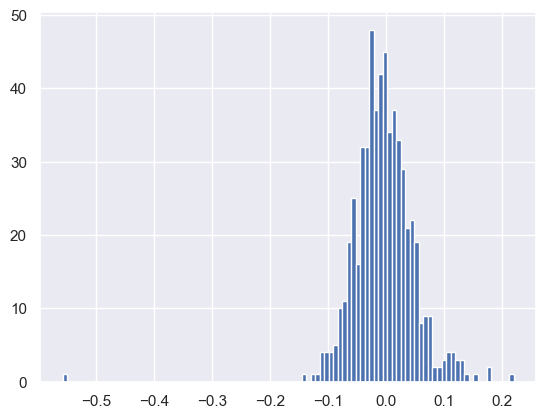

In [71]:
import seaborn as sns
sns.set()

df.daily_change.hist(bins = 100)

<AxesSubplot:xlabel='Date'>

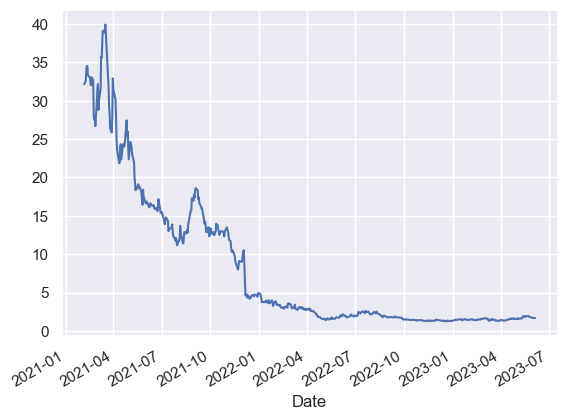

In [72]:
df.close.plot()

In [73]:
df

,open,high,low,close,volume,average,close_shift,daily_change
Date,,,,,,,,
2021-02-05,26.10,33.9600,22.630,32.15,6910823,29.125,NaN,NaN
2021-02-08,28.40,34.8800,28.110,32.60,720402,30.500,32.15,0.013997
2021-02-09,32.70,34.5000,30.020,33.90,623927,33.300,32.60,0.039877
2021-02-10,34.00,35.1950,33.035,34.54,315198,34.270,33.90,0.018879
2021-02-11,35.88,35.8800,32.010,34.51,488809,35.195,34.54,-0.000869
...,...,...,...,...,...,...,...,...
2023-05-30,1.86,1.8600,1.700,1.71,156122,1.785,1.83,-0.065574
2023-05-31,1.71,1.7539,1.620,1.72,194331,1.715,1.71,0.005848
2023-06-01,1.73,1.8000,1.670,1.70,65924,1.715,1.72,-0.011628
